# Probability Distributions

A probability distribution is a mathematical function that describes the likelihood of different possible outcomes for a random variable. It provides the probabilities of all possible values that a random variable can take, essentially showing how the values are distributed.

Probability distributions are theoretical models that describe populations rather than specific samples. They're idealized versions of frequency distributions that help us understand and predict the behavior of random phenomena.

**Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, binom, poisson, expon, uniform
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
sns.set_context("talk")
sns.set_palette("bright")

There are essentially two main types of distributions: 

**Discrete Probability Distributions**
- Deal with variables that can only take specific, countable values
- Described by a probability mass function (PMF)
- Examples: number of heads in coin flips, number of defective items in a batch

**Continuous Probability Distributions**
- Deal with variables that can take any value within a range
- Described by a probability density function (PDF)
- The probability of any specific value is essentially zero, but intervals have meaningful probabilities

**Continuous Distributions: Density and Cumulative Functions**

Probability Density Function (PDF):
- Shows the probability density at each point
- For continuous distributions, area under the curve represents probability

Cumulative Distribution Function (CDF):
- Shows the probability that a random variable is less than or equal to a specific value
- Always increases from 0 to 1
- Formula: $F(x) = P(X \leq x)$

# Normal Distribution (Gaussian distribution)

Probably the most important one here. The normal distribution is the most commonly used probability distribution in statistics. Its **key characteristics**:
- Bell-shaped curve that is perfectly symmetrical around the mean
- Unimodal: has only one peak
- Asymptotic: the tails approach but never touch the x-axis
- Mean, median, and mode are all equal

**Mathematical properties:**
- Fully characterized by two parameters: mean (μ) and standard deviation (σ)
- Standard normal distribution has mean = 0 and standard deviation = 1
- Zero skew and kurtosis = 3

**The Empirical Rule (68-95-99.7 Rule):**
- 68% of data falls within 1 standard deviation of the mean
- 95% of data falls within 2 standard deviations
- 99.7% of data falls within 3 standard deviations

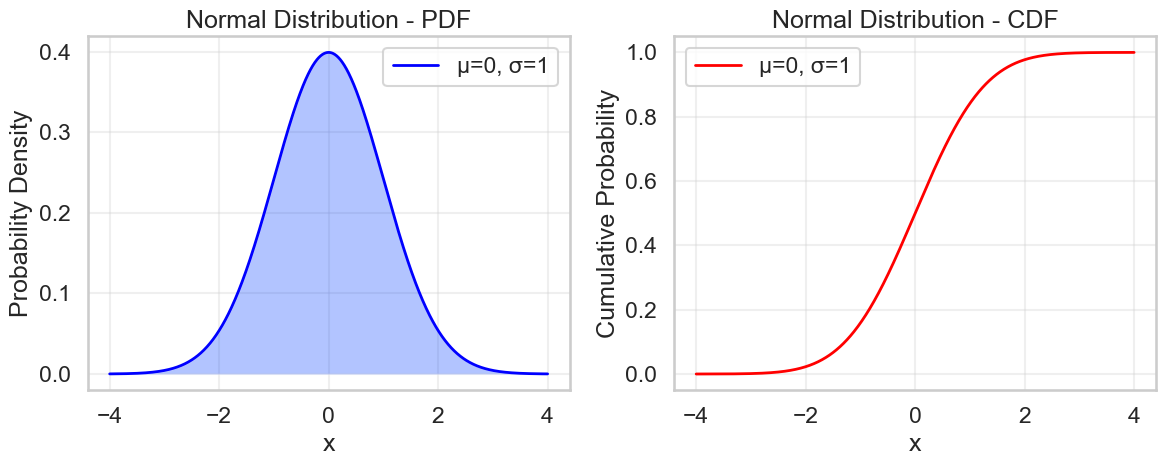

In [2]:
# Parameters
mu = 0  # mean
sigma = 1  # standard deviation

# Create x values
x = np.linspace(-4, 4, 1000)

# Calculate PDF and CDF
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
ax1.plot(x, pdf, 'b-', linewidth=2, label=f'μ={mu}, σ={sigma}')
ax1.fill_between(x, pdf, alpha=0.3)
ax1.set_title('Normal Distribution - PDF')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot CDF
ax2.plot(x, cdf, 'r-', linewidth=2, label=f'μ={mu}, σ={sigma}')
ax2.set_title('Normal Distribution - CDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

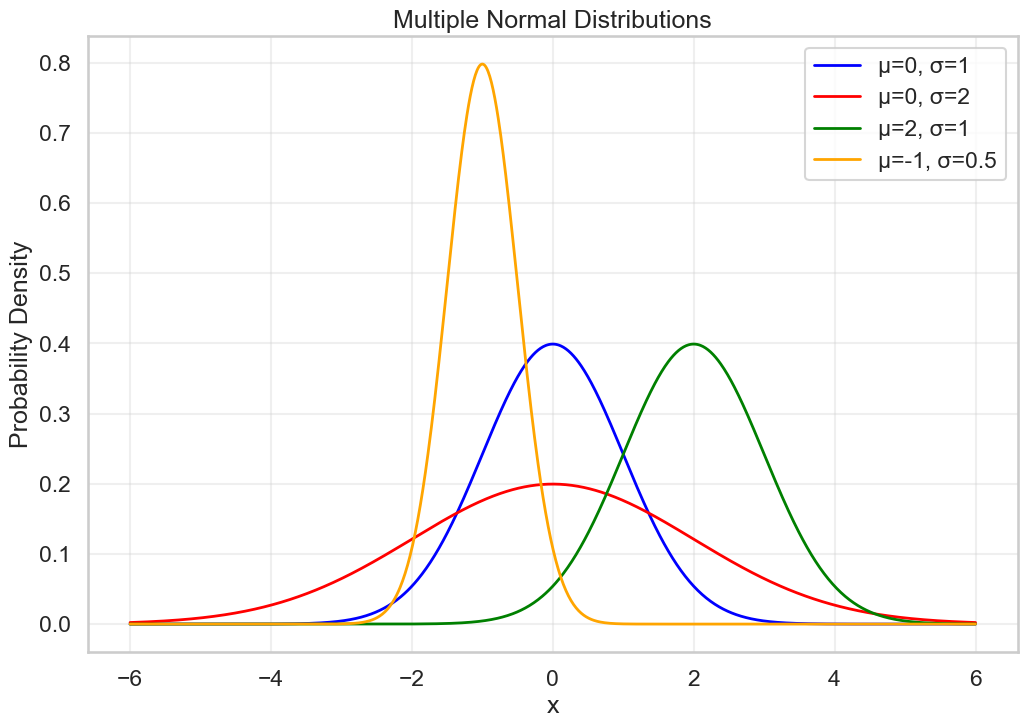

In [3]:
# Different parameters
params = [(0, 1), (0, 2), (2, 1), (-1, 0.5)]
colors = ['blue', 'red', 'green', 'orange']

x = np.linspace(-6, 6, 1000)

plt.figure(figsize=(12, 8))

for i, (mu, sigma) in enumerate(params):
    pdf = norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, color=colors[i], linewidth=2, 
             label=f'μ={mu}, σ={sigma}')

plt.title('Multiple Normal Distributions')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

From the plots above, we can see that a **normal distribution** doesn’t always have to have a mean (μ) of 0 or a standard deviation (σ) of 1.

- The **mean (μ)** moves the whole curve left or right. It shows where the center of the data is.
- The **standard deviation (σ)** changes how wide or narrow the curve is. It tells us how spread out the data are around the mean.

What makes a distribution normal is its bell shape, described by a specific formula. Changing the mean and standard deviation just shifts and stretches the bell, but the basic shape stays the same.

So, all the curves you see here are normal distributions - they just have different centers and spreads.

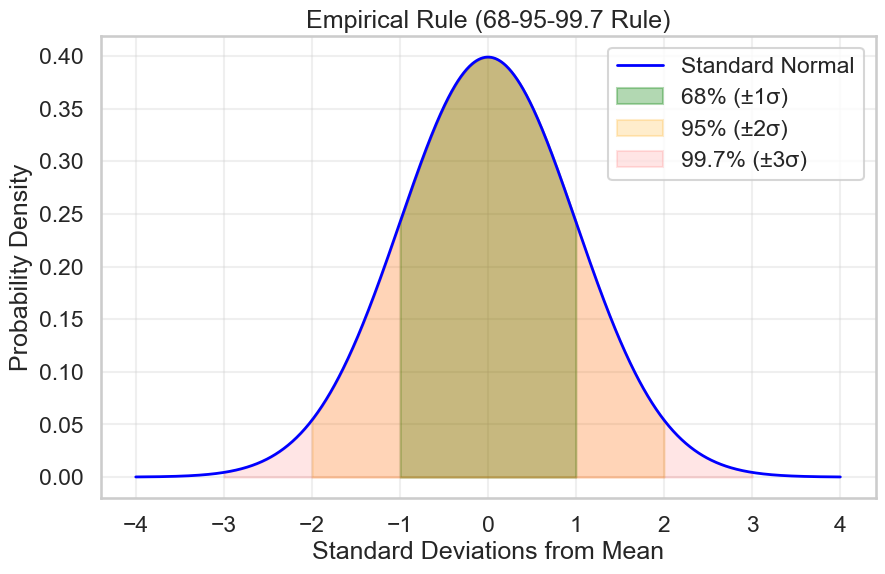

In [4]:
# Standard normal distribution
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, 'b-', linewidth=2, label='Standard Normal')

# Shade areas for empirical rule
x_68 = x[(x >= -1) & (x <= 1)]
pdf_68 = norm.pdf(x_68, 0, 1)
plt.fill_between(x_68, pdf_68, alpha=0.3, color='green', label='68% (±1σ)')

x_95 = x[(x >= -2) & (x <= 2)]
pdf_95 = norm.pdf(x_95, 0, 1)
plt.fill_between(x_95, pdf_95, alpha=0.2, color='orange', label='95% (±2σ)')

x_997 = x[(x >= -3) & (x <= 3)]
pdf_997 = norm.pdf(x_997, 0, 1)
plt.fill_between(x_997, pdf_997, alpha=0.1, color='red', label='99.7% (±3σ)')

plt.title('Empirical Rule (68-95-99.7 Rule)')
plt.xlabel('Standard Deviations from Mean')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# Binomial Distribution
- Used for discrete events with two possible outcomes (success/failure)
- Parameters: number of trials (n) and probability of success (p)
- Example: Number of heads in 10 coin flips

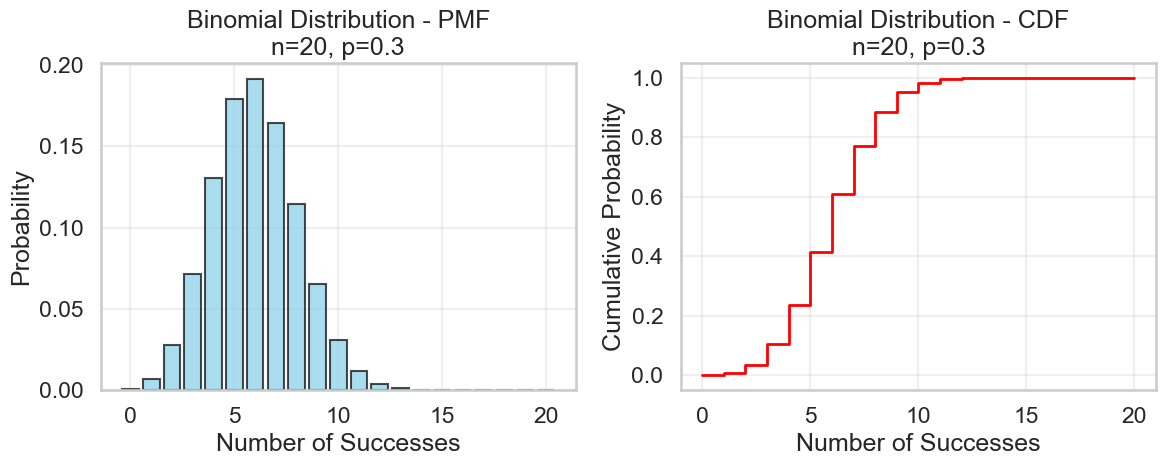

Mean: 6.00
Variance: 4.20
Standard Deviation: 2.05


In [5]:
# Parameters
n = 20  # number of trials
p = 0.3  # probability of success

# Create x values (possible outcomes)
x = np.arange(0, n + 1)

# Calculate PMF and CDF
pmf = binom.pmf(x, n, p)
cdf = binom.cdf(x, n, p)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PMF
ax1.bar(x, pmf, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title(f'Binomial Distribution - PMF\nn={n}, p={p}')
ax1.set_xlabel('Number of Successes')
ax1.set_ylabel('Probability')
ax1.grid(True, alpha=0.3)

# Plot CDF
ax2.step(x, cdf, where='post', linewidth=2, color='red')
ax2.set_title(f'Binomial Distribution - CDF\nn={n}, p={p}')
ax2.set_xlabel('Number of Successes')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean: {binom.mean(n, p):.2f}")
print(f"Variance: {binom.var(n, p):.2f}")
print(f"Standard Deviation: {binom.std(n, p):.2f}")


From the plots, we can see a clear difference between continuous and discrete distributions. 

The normal distribution is continuous, so its PDF is a smooth curve. In contrast, the binomial distribution is discrete, and its PMF consists of bars since it only takes integer values.

When it comes to the CDF, the difference is also clear: the normal CDF is a smooth S(ish)-shaped curve, while the binomial CDF is a step function, jumping at each possible outcome.

In short, the normal distribution flows continuously across values, while the binomial jumps between them - both in how probabilities are assigned and how they accumulate.

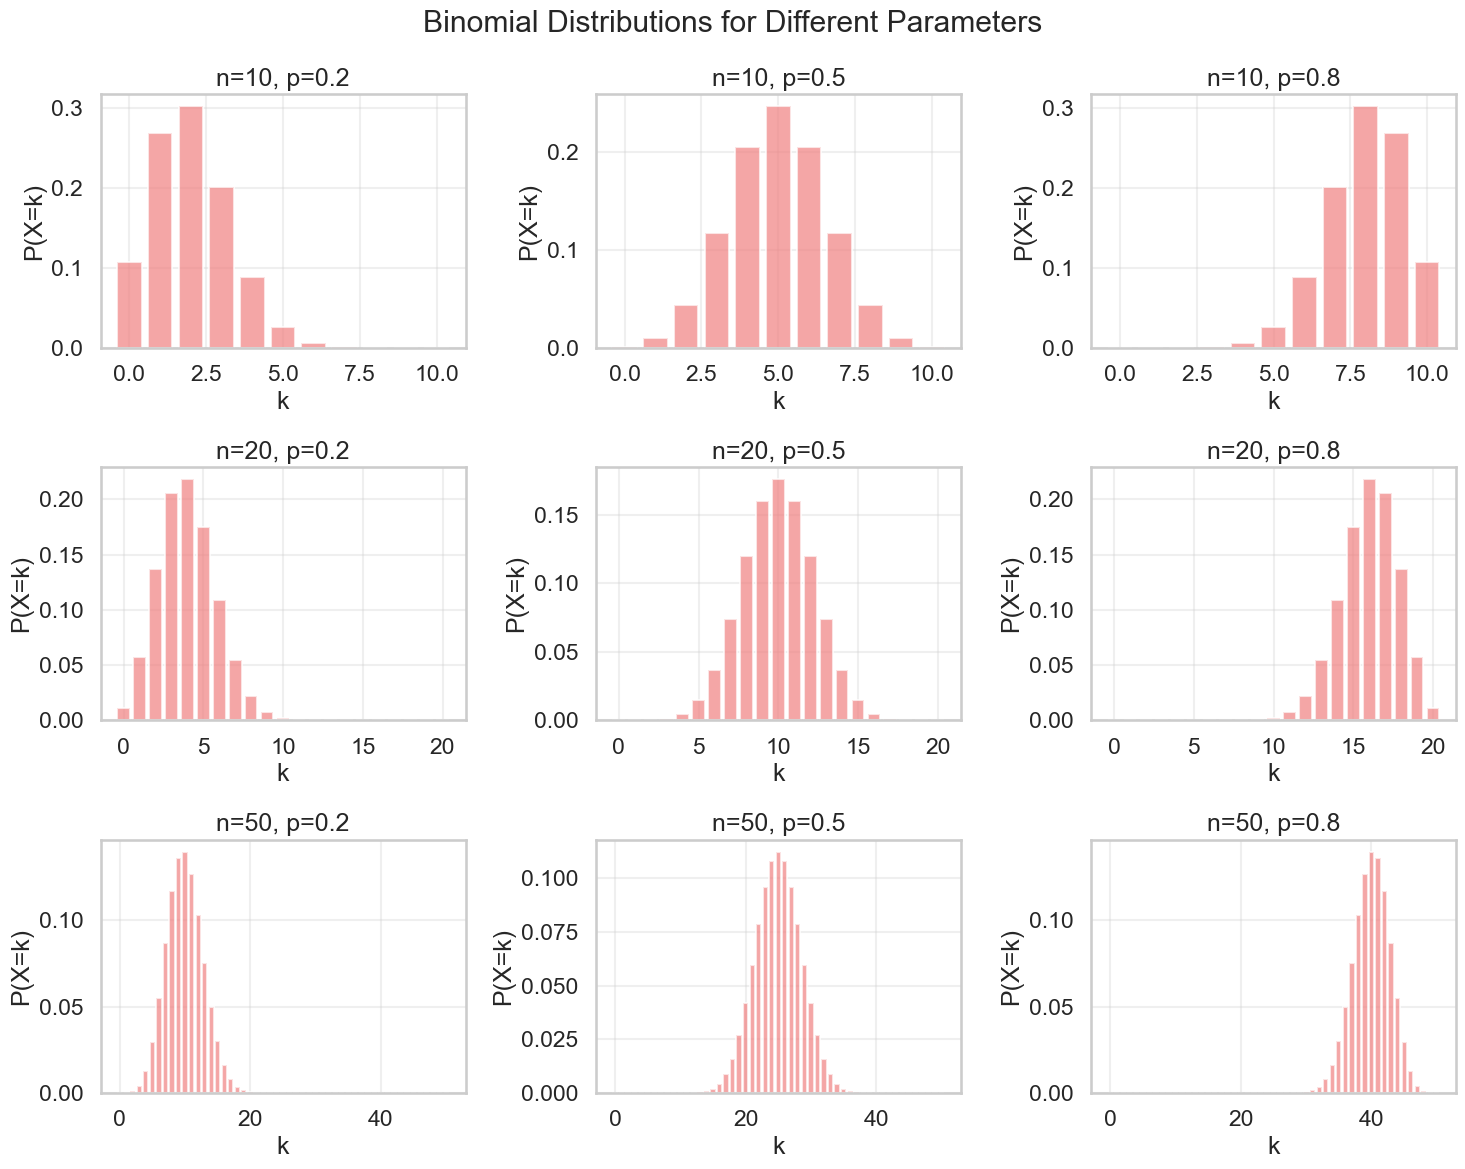

In [6]:
# Different parameters
n_vals = [10, 20, 50]
p_vals = [0.2, 0.5, 0.8]

fig, axes = plt.subplots(len(n_vals), len(p_vals), figsize=(15, 12))

for i, n in enumerate(n_vals):
    for j, p in enumerate(p_vals):
        x = np.arange(0, n + 1)
        pmf = binom.pmf(x, n, p)
        
        axes[i, j].bar(x, pmf, alpha=0.7, color='lightcoral')
        axes[i, j].set_title(f'n={n}, p={p}')
        axes[i, j].set_xlabel('k')
        axes[i, j].set_ylabel('P(X=k)')
        axes[i, j].grid(True, alpha=0.3)
fig.suptitle('Binomial Distributions for Different Parameters')
plt.tight_layout()
plt.show()

# Poisson Distribution
- Describes the probability of events occurring within a fixed interval
- Useful for rare events (e.g., number of patients arriving at emergency room per hour)
- Parameter: λ (lambda) - the average rate of occurrence

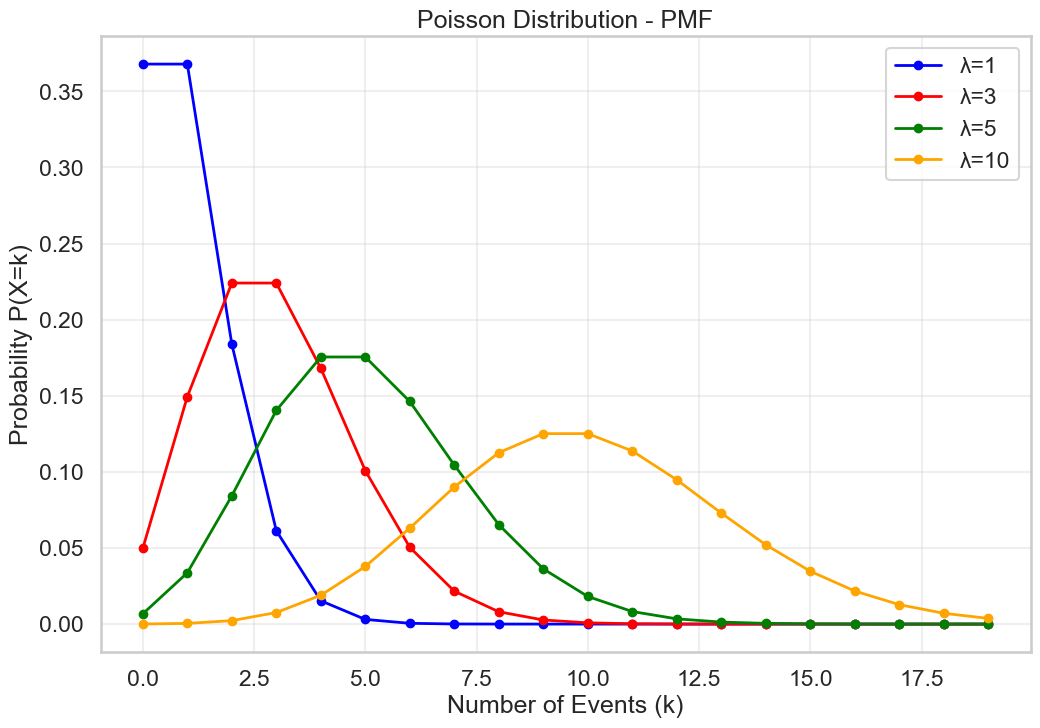

λ=1: Mean=1.00, Variance=1.00
λ=3: Mean=3.00, Variance=3.00
λ=5: Mean=5.00, Variance=5.00
λ=10: Mean=10.00, Variance=10.00


In [7]:
# Parameters
lambda_vals = [1, 3, 5, 10]
colors = ['blue', 'red', 'green', 'orange']

x = np.arange(0, 20)

plt.figure(figsize=(12, 8))

for i, lam in enumerate(lambda_vals):
    pmf = poisson.pmf(x, lam)
    plt.plot(x, pmf, 'o-', color=colors[i], linewidth=2, 
             markersize=6, label=f'λ={lam}')

plt.title('Poisson Distribution - PMF')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability P(X=k)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Statistics for different lambda values
for lam in lambda_vals:
    print(f"λ={lam}: Mean={poisson.mean(lam):.2f}, Variance={poisson.var(lam):.2f}")

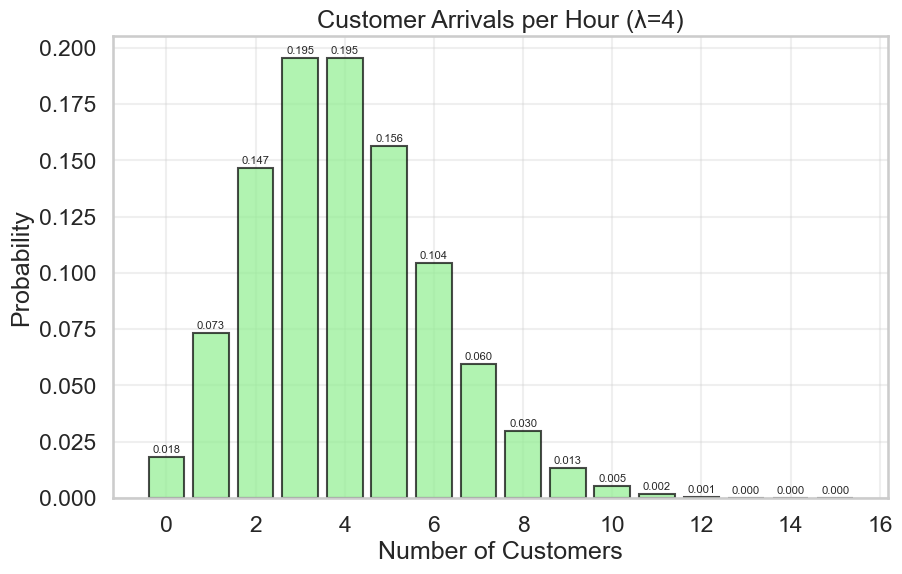

In [8]:
# Example: Number of customers arriving per hour
lambda_rate = 4  # average 4 customers per hour

# Possible number of customers (0 to 15)
k = np.arange(0, 16)
pmf = poisson.pmf(k, lambda_rate)

plt.figure(figsize=(10, 6))
bars = plt.bar(k, pmf, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title(f'Customer Arrivals per Hour (λ={lambda_rate})')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, prob in zip(bars, pmf):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{prob:.3f}', ha='center', va='bottom', fontsize=8)

plt.show()


As we can see, the **Binomial** and **Poisson** distributions may look quite similar at first glance. But they are not, they are very different.

**Binomial** distribution is like flipping a coin 10 times and counting heads - you have a fixed number of tries and you're counting successes. **Poisson** distribution is like counting how many phone calls you get per hour - you don't know how many total calls are possible, you are just measuring events happening over time.

So, when to use which one? Use **Binomial** when you have a specific number of attempts (like testing 100 products for defects). Use **Poisson** when you are counting rare events that happen randomly over time or space (like customer arrivals or website crashes per day).

**Key difference**: *Binomial* has a fixed "sample size," *Poisson* does not - it just measures the rate of random events.

# Exponential Distribution
- Describes time between independent events
- Examples: Time between earthquakes, customer arrivals
- Higher probabilities for small values than large values
- Parameter: λ (lambda) - the average rate at which events occur  

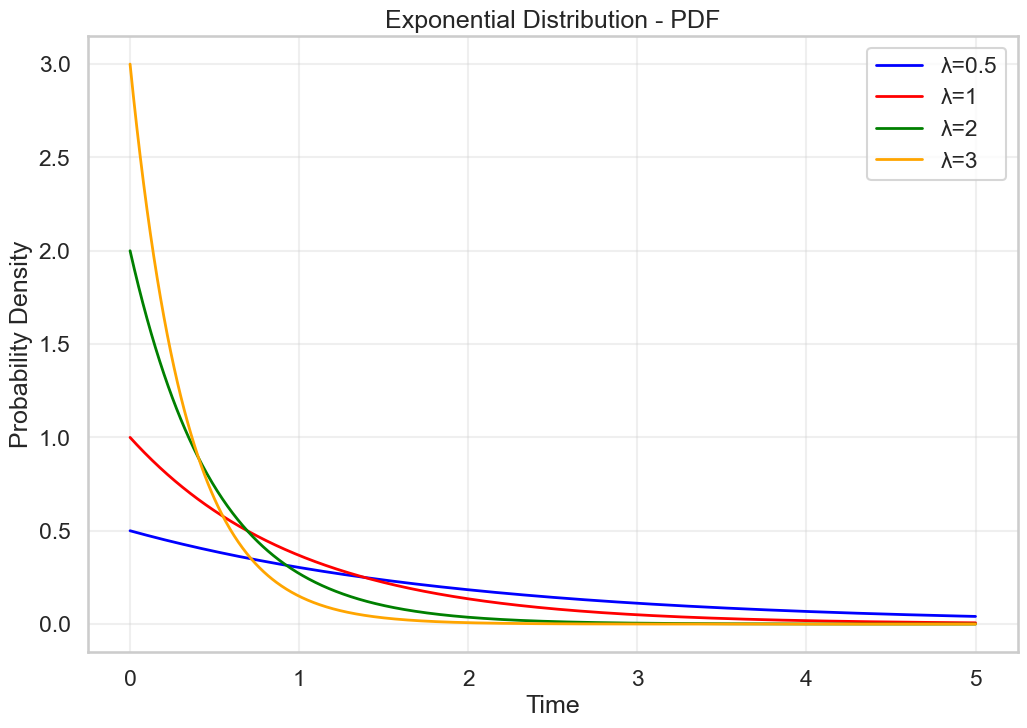

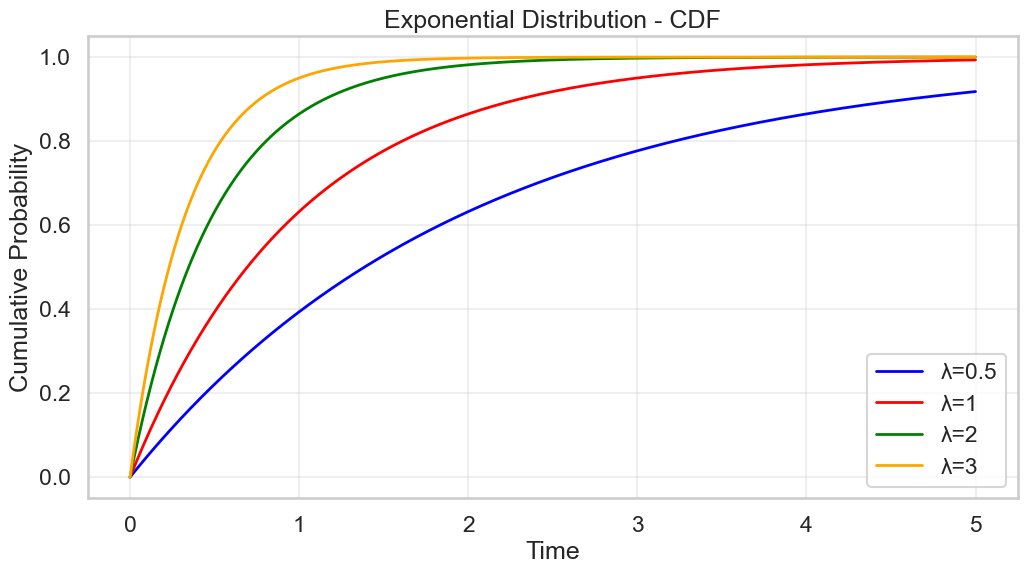

In [9]:
# Parameters
lambda_vals = [0.5, 1, 2, 3]
colors = ['blue', 'red', 'green', 'orange']

x = np.linspace(0, 5, 1000)

plt.figure(figsize=(12, 8))

for i, lam in enumerate(lambda_vals):
    pdf = expon.pdf(x, scale=1/lam)  # scale = 1/λ
    plt.plot(x, pdf, color=colors[i], linewidth=2, 
             label=f'λ={lam}')

plt.title('Exponential Distribution - PDF')
plt.xlabel('Time')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# CDF comparison
plt.figure(figsize=(12, 6))

for i, lam in enumerate(lambda_vals):
    cdf = expon.cdf(x, scale=1/lam)
    plt.plot(x, cdf, color=colors[i], linewidth=2, 
             label=f'λ={lam}')

plt.title('Exponential Distribution - CDF')
plt.xlabel('Time')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Uniform Distribution (rectangular)
- All outcomes within a range are equally likely
- Example: Time cars wait at a red light (within reasonable bounds)

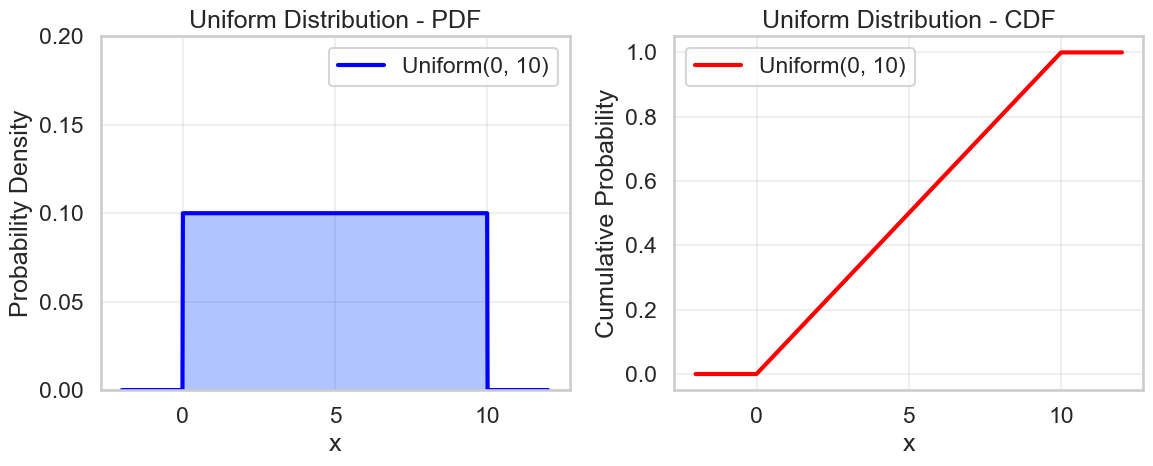

In [10]:
# Parameters
a, b = 0, 10  # interval [a, b]

x = np.linspace(-2, 12, 1000)

# Calculate PDF and CDF
pdf = uniform.pdf(x, a, b-a)  # uniform uses loc=a, scale=b-a
cdf = uniform.cdf(x, a, b-a)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDF
ax1.plot(x, pdf, 'b-', linewidth=3, label=f'Uniform({a}, {b})')
ax1.fill_between(x, pdf, alpha=0.3)
ax1.set_title('Uniform Distribution - PDF')
ax1.set_xlabel('x')
ax1.set_ylabel('Probability Density')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim(0, 0.2)

# Plot CDF
ax2.plot(x, cdf, 'r-', linewidth=3, label=f'Uniform({a}, {b})')
ax2.set_title('Uniform Distribution - CDF')
ax2.set_xlabel('x')
ax2.set_ylabel('Cumulative Probability')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

# Sampling vs Theoretical

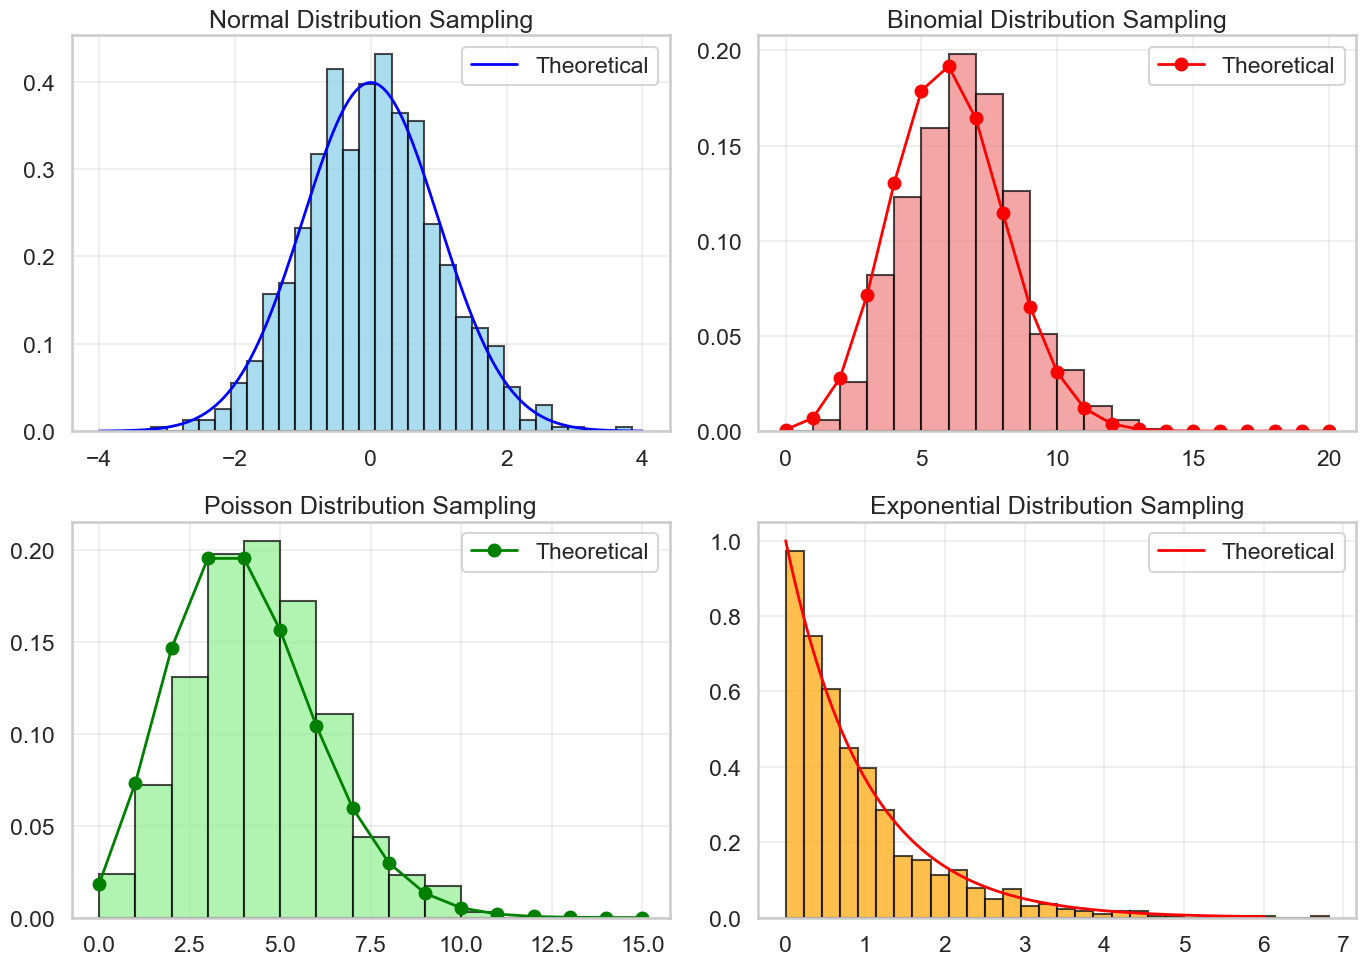

In [11]:
# Generate random samples and compare with theoretical distributions
np.random.seed(42)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Normal distribution sampling
samples_norm = np.random.normal(0, 1, 1000)
axes[0, 0].hist(samples_norm, bins=30, density=True, alpha=0.7, 
                color='skyblue', edgecolor='black')
x_norm = np.linspace(-4, 4, 1000)
axes[0, 0].plot(x_norm, norm.pdf(x_norm, 0, 1), 'b-', linewidth=2, 
                label='Theoretical')
axes[0, 0].set_title('Normal Distribution Sampling')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Binomial distribution sampling
samples_binom = np.random.binomial(20, 0.3, 1000)
axes[0, 1].hist(samples_binom, bins=range(0, 21), density=True, 
                alpha=0.7, color='lightcoral', edgecolor='black')
x_binom = np.arange(0, 21)
axes[0, 1].plot(x_binom, binom.pmf(x_binom, 20, 0.3), 'ro-', 
                linewidth=2, label='Theoretical')
axes[0, 1].set_title('Binomial Distribution Sampling')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Poisson distribution sampling
samples_pois = np.random.poisson(4, 1000)
axes[1, 0].hist(samples_pois, bins=range(0, 16), density=True, 
                alpha=0.7, color='lightgreen', edgecolor='black')
x_pois = np.arange(0, 16)
axes[1, 0].plot(x_pois, poisson.pmf(x_pois, 4), 'go-', 
                linewidth=2, label='Theoretical')
axes[1, 0].set_title('Poisson Distribution Sampling')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Exponential distribution sampling
samples_exp = np.random.exponential(1, 1000)
axes[1, 1].hist(samples_exp, bins=30, density=True, alpha=0.7, 
                color='orange', edgecolor='black')
x_exp = np.linspace(0, 6, 1000)
axes[1, 1].plot(x_exp, expon.pdf(x_exp, scale=1), 'r-', 
                linewidth=2, label='Theoretical')
axes[1, 1].set_title('Exponential Distribution Sampling')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
